<h2><center> Global Crop Consumption - Eugene Tettey Ayerkain


## Table of contents

1. [Importing Libraries](#Libraries)
2. [Data Loading and Exploration](#Data)\
    2.1 [Data Loading & Preview](#load)\
    2.2 [Data Exploration](#explore)\
    2.2.1 [Descriptions](#describe)\
    2.2.2 [Scatter plot](#scatter)\
    2.2.3 [Distributions](#distribution)
3. [Data Preparation & Analysis](#analyses)\
    3.1 [Consumption by Locations](#largestandleast)\
    3.2 [Consumptions by Nation Groups](#nationgroups)\
    3.2.1 [BRICS Consumption](#brics)\
    3.2.2 [SSA Consumption](#ssa)\
    3.2.3 [EU28 Consumption](#eu)\
    3.2.4 [OECD Consumption](#oecd)\
    3.2.5 [Largest Consumption Among Nation Groups](#nationslargest)\
    3.2.6 [Least Consumption Among Nation Groups](#nationsleast)\
    3.2.7 [Most Crop and Least Crop Consumption](#leastndlarge)\
    3.3 [Trends of Crop Consumption](#trends)\
    3.3.1 [Historical Trends](#trends)\
    3.3.2 [Forecast Trends](#forecast)

<a name="Libraries"></a>
## 1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a name="Data"></a>
## 2. Data Loading and Exploration

<a name="load"></a>
### 2.1 Data Loading & Preview

In [2]:
# loading the data
df = pd.read_csv("crop_consumption.csv")
df

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,RICE,TONNE_HA,1990,5.374114
1,AUS,RICE,TONNE_HA,1991,5.897753
2,AUS,RICE,TONNE_HA,1992,5.903150
3,AUS,RICE,TONNE_HA,1993,5.221311
4,AUS,RICE,TONNE_HA,1994,5.457576
...,...,...,...,...,...
21160,EU28,SOYBEAN,TONNE_HA,2022,2.897405
21161,EU28,SOYBEAN,TONNE_HA,2023,2.903548
21162,EU28,SOYBEAN,TONNE_HA,2024,2.915203
21163,EU28,SOYBEAN,TONNE_HA,2025,2.919959


In [3]:
df.head(20)

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,RICE,TONNE_HA,1990,5.374114
1,AUS,RICE,TONNE_HA,1991,5.897753
2,AUS,RICE,TONNE_HA,1992,5.903150
3,AUS,RICE,TONNE_HA,1993,5.221311
4,AUS,RICE,TONNE_HA,1994,5.457576
5,AUS,RICE,TONNE_HA,1995,5.925000
6,AUS,RICE,TONNE_HA,1996,4.257047
7,AUS,RICE,TONNE_HA,1997,5.545181
8,AUS,RICE,TONNE_HA,1998,6.270739
9,AUS,RICE,TONNE_HA,1999,5.924013


In [4]:
#checking for NaN types (missing values)
df.isna().sum()

LOCATION    0
SUBJECT     0
MEASURE     0
TIME        0
Value       0
dtype: int64

The data has no missing values!

<a name="explore"></a>
### 2.2 Data Exploration

<a name="describe"></a>
### 2.2.1 Descriptions

In [5]:
df.describe()

,TIME,Value
count,21165.000000,2.116500e+04
mean,2008.114387,1.274159e+04
std,10.624953,6.069582e+04
min,1990.000000,0.000000e+00
25%,1999.000000,1.980784e+00
50%,2008.000000,2.400000e+01
75%,2017.000000,1.580247e+03
max,2026.000000,1.163711e+06


In [6]:
unique_counts = df.nunique()
unique_counts

LOCATION       48
SUBJECT         4
MEASURE         3
TIME           37
Value       16264
dtype: int64

In [7]:
df.dtypes

LOCATION     object
SUBJECT      object
MEASURE      object
TIME          int64
Value       float64
dtype: object

In [8]:
df['LOCATION'].describe()

count     21165
unique       48
top         AUS
freq        444
Name: LOCATION, dtype: object

In [9]:
df['SUBJECT'].describe()

count     21165
unique        4
top       WHEAT
freq       5295
Name: SUBJECT, dtype: object

In [10]:
df['MEASURE'].describe()

count       21165
unique          3
top       THND_HA
freq         7061
Name: MEASURE, dtype: object

In [11]:
df['TIME'].describe()

count    21165.000000
mean      2008.114387
std         10.624953
min       1990.000000
25%       1999.000000
50%       2008.000000
75%       2017.000000
max       2026.000000
Name: TIME, dtype: float64

In [12]:
df['Value'].describe()

count    2.116500e+04
mean     1.274159e+04
std      6.069582e+04
min      0.000000e+00
25%      1.980784e+00
50%      2.400000e+01
75%      1.580247e+03
max      1.163711e+06
Name: Value, dtype: float64

In [13]:
df['LOCATION'].unique()
# df['LOCATION'].nunique()

array(['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'DZA',
       'ARG', 'BGD', 'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'GHA',
       'IND', 'IDN', 'IRN', 'KAZ', 'MYS', 'MOZ', 'NGA', 'PAK', 'PRY',
       'PER', 'PHL', 'RUS', 'SAU', 'ZAF', 'SDN', 'TZA', 'THA', 'UKR',
       'URY', 'VNM', 'ZMB', 'WLD', 'SSA', 'OECD', 'BRICS', 'NOR', 'CHE',
       'EU28', 'ISR', 'HTI'], dtype=object)

In [15]:
locations = df['LOCATION'].nunique()
print(f"There are {locations} locations involved in the dataset")

There are 48 locations involved in the dataset


In [14]:
df['TIME'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025, 2026], dtype=int64)

In [16]:
df['SUBJECT'].unique()

array(['RICE', 'WHEAT', 'MAIZE', 'SOYBEAN'], dtype=object)

In [17]:
crops = df['SUBJECT'].nunique()
print(f"There are {crops} crops involved")

There are 4 crops involved


In [18]:
df['MEASURE'].unique()

array(['TONNE_HA', 'THND_TONNE', 'THND_HA'], dtype=object)

In [19]:
measure = df['MEASURE'].nunique()
print(f"There are {measure} measurements used in the dataset")

There are 3 measurements used in the dataset


<a name="scatter"></a>
### 2.2.2 Scatter Plot

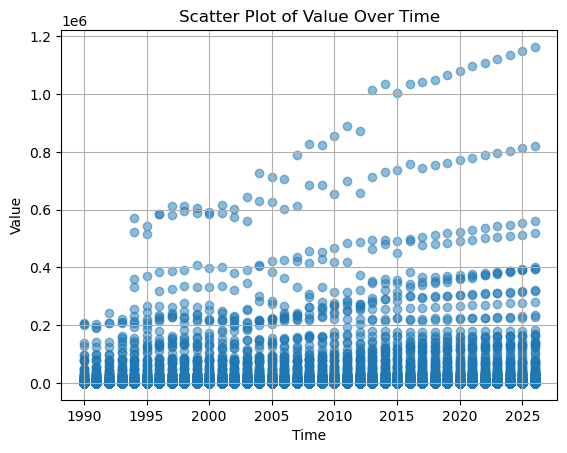

In [20]:
plt.scatter(df['TIME'], df['Value'], alpha=0.5)  # Plot TIME on the x-axis and Value on the y-axis
plt.title('Scatter Plot of Value Over Time')  # Set the title
plt.xlabel('Time')  # Label for the x-axis
plt.ylabel('Value')  # Label for the y-axis
plt.grid(True)  # Show grid lines
plt.show()

<a name="distribution"></a>
### 2.2.3 Vallue Distribution

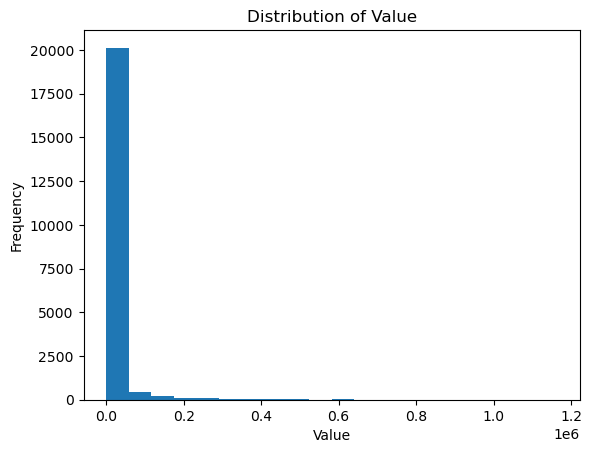

In [21]:
plt.hist(df['Value'], bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Value')
plt.show()

<a name="analyses"></a>
## 3. Data Preparation and Analysis

### Preparing the Data
> In this section we separate the dataset into the hostorical part and the forecast part. The recorded data runs from the year 1990 to 2026
The history data will begin from 1990 to 2022 and the forecast data from 2023 to 2026

In [23]:
'''
- preparing the needed dataframe, we shall use the THND_TONNE, which represents
thousands of tonnes. This is the measurement to be used all throughout.
- we then separate the dataframe into the history_df and forecast_df 
'''
tonne_df = df[df['MEASURE'] == 'THND_TONNE']

#separating into two: from 1994 to 2023 and from 2023 to 2026
history_df = tonne_df[(tonne_df['TIME'] >= 1994) & (tonne_df['TIME'] <= 2023)]
forecast_df = tonne_df[(tonne_df['TIME'] >= 2023) & (tonne_df['TIME'] <= 2026)]

<a name="largestandleast"></a>
### 3.1 Largest and Least Crop Consumption by Location
> Here, we find the locations (countries) that consume the most of each of the crops

- Highest Consumption

In [71]:
'''
* Finding the locations that consume the most of each crop
- group the data by each crop and location
- calculate the total consumption
'''
# Grouping by each crop and location
grouped_data = history_df.groupby(['SUBJECT', 'LOCATION'])

#calculating the total production
total_consumption = grouped_data['Value'].sum()

#Finding the location with the highest consumption for each crop
max_conusmption_locations = total_consumption.groupby('SUBJECT').idxmax()
locations_with_highest_consumption = total_consumption.loc[max_conusmption_locations]

print("Locations that consume the most of each crop in terms of THND_TONNE:")
print(locations_with_highest_consumption)

Locations that consume the most of each crop in terms of THND_TONNE:
SUBJECT  LOCATION
MAIZE    WLD         2.479393e+07
RICE     WLD         1.355460e+07
SOYBEAN  WLD         7.380773e+06
WHEAT    WLD         1.995238e+07
Name: Value, dtype: float64


**Comment**
> **Wld**, which reprersents the rest of the world (world aggregate), it represents the aggreagates values for the entire world. In order to find the countries that actually consume the most and the least, we shall filter the data to remove values related to 'WLD'

> We filter out all locations that we dont want. In this case, the nation groups as well as WLD, the world aggregate.

In [72]:
''''
- locations to remove: wld, brics, ssa, oecd, Eu28
_ create list of locations to remove
'''
#creating list of locations to be removed
removed_locations = ['WLD', 'SSA', 'OECD', 'BRICS', 'EU28']
filtered_df = history_df[~history_df['LOCATION'].isin(removed_locations)]

new_grouped_data = filtered_df.groupby(['SUBJECT', 'LOCATION'])

#calculating the total production
total_consumption = new_grouped_data['Value'].sum()

#Finding the location with the highest consumption for each crop
max_conusmption_locations = filtered_df.loc[filtered_df.groupby('SUBJECT')['Value'].idxmax()]


print("Locations that consume the most of each crop in terms of THND_TONNE:")
print(max_conusmption_locations[['SUBJECT', 'LOCATION', 'Value']])

Locations that consume the most of each crop in terms of THND_TONNE:
       SUBJECT LOCATION          Value
11424    MAIZE      USA  384789.496000
4877      RICE      CHN  143580.828724
12573  SOYBEAN      BRA  127552.909375
9144     WHEAT      CHN  131187.208747


**Comment**
> **USA** turns out as the highest consumer of maize, **China** consumes the highest of Rice and Wheat and **Brazil** consumes the highest of soybean

* Least consumption

In [74]:
#Finding the location with the lowest consumption for each crop
min_conusmption_locations = filtered_df.loc[filtered_df.groupby('SUBJECT')['Value'].idxmin()]

locations_with_least_consumption = total_consumption.loc[min_consumption_locations]

print("Locations that consume the least of each crop in terms of THND_TONNE:")
print(min_conusmption_locations[['SUBJECT', 'LOCATION', 'Value']])

Locations that consume the least of each crop in terms of THND_TONNE:
       SUBJECT LOCATION    Value
17082    MAIZE      NOR  0.00000
4589      RICE      CHE  0.00000
14316  SOYBEAN      NOR  0.00000
4518     WHEAT      THA  0.00009


**Comment**
> **Norway**, consumes the least of Maize and Soybean, whlie **Switzerland** consumes the least of Rice and the **Thailand** consumes the least of Wheat.

<a name="nationgroups"></a>
### 3.2 Consumptions by Nation Groups
> In this section, we explore the consumptions by the nation groups present in the dataset. We consider the BRICS, SSA, EU, and OECD

<a name="brics"></a>
#### 3.2.1 Total Consumption by BRICS

> BRICS refers to the countries: Brazil, Russia, India, China and South Africa

In [66]:
'''
- filter history_df by BRICS
- filter each crop out
- get total of each crop consumed
- print out
'''

#filtering for BRICS
brics_tonne = history_df[history_df['LOCATION'] == 'BRICS']

#filtering each crop from brics_tonne
brics_rice = brics_tonne[brics_tonne['SUBJECT'] == 'RICE']
brics_wheat = brics_tonne[brics_tonne['SUBJECT'] == 'WHEAT']
brics_maize = brics_tonne[brics_tonne['SUBJECT'] == 'MAIZE']
brics_soybean = brics_tonne[brics_tonne['SUBJECT'] == 'SOYBEAN']

#total amounts of crops consumed by th BRICS
brics_rice_total = brics_rice['Value'].sum()
brics_wheat_total = brics_wheat['Value'].sum()
brics_maize_total = brics_maize['Value'].sum()
brics_soybean_total = brics_soybean['Value'].sum()

#Print the amounts of tonnes brics consume
print('The total rice consumpion by the BRICS is', brics_rice_total, 'THND_TONNE')
print('The total wheat consumpion by the BRICS is', brics_wheat_total, 'THND_TONNE')
print('The total maize consumpion by the BRICS is', brics_maize_total, 'THND_TONNE')
print('The total soybean consumpion by the BRICS is', brics_soybean_total, 'THND_TONNE')

The total rice consumpion by the BRICS is 7188018.933441593 THND_TONNE
The total wheat consumpion by the BRICS is 7614462.739912844 THND_TONNE
The total maize consumpion by the BRICS is 7919471.226331914 THND_TONNE
The total soybean consumpion by the BRICS is 2868953.2227827697 THND_TONNE


<a name="ssa"></a>
#### 3.2.2 Totoal Consumption by SSA

> SSA refers to the Sub-Sahara Africa.

In [75]:
#filtering SSA
ssa_tonne = history_df[history_df['LOCATION'] == 'SSA']

#filtering each crop from ssa_tonne
ssa_rice = ssa_tonne[ssa_tonne['SUBJECT'] == 'RICE']
ssa_wheat = ssa_tonne[ssa_tonne['SUBJECT'] == 'WHEAT']
ssa_maize = ssa_tonne[ssa_tonne['SUBJECT'] == 'MAIZE']
ssa_soybean = ssa_tonne[ssa_tonne['SUBJECT'] == 'SOYBEAN']

#total amounts of crops consumed by the SSA
ssa_rice_total = ssa_rice['Value'].sum()
ssa_wheat_total = ssa_wheat['Value'].sum()
ssa_maize_total = ssa_maize['Value'].sum()
ssa_soybean_total = ssa_soybean['Value'].sum()

#Print the amounts of tonnes SSA consume
print('The total rice consumpion by the SSA is', ssa_rice_total, 'THND_TONNE')
print('The total wheat consumpion by the SSA is', ssa_wheat_total, 'THND_TONNE')
print('The total maize consumpion by the SSA is', ssa_maize_total, 'THND_TONNE')
print('The total soybean consumpion by the SSA is', ssa_soybean_total, 'THND_TONNE')

The total rice consumpion by the SSA is 348880.1949703423 THND_TONNE
The total wheat consumpion by the SSA is 125930.11335538587 THND_TONNE
The total maize consumpion by the SSA is 1241228.3364247363 THND_TONNE
The total soybean consumpion by the SSA is 30329.513760351852 THND_TONNE


<a name="eu"></a>
#### 3.2.3 Totoal Consumption by EU28

> EU28 refers to the 28 countries that make up the European Union

In [28]:
#filtering EU28
eu_tonne = history_df[history_df['LOCATION'] == 'EU28']

#filtering each crop from eu_tonne
eu_rice = eu_tonne[eu_tonne['SUBJECT'] == 'RICE']
eu_wheat = eu_tonne[eu_tonne['SUBJECT'] == 'WHEAT']
eu_maize = eu_tonne[eu_tonne['SUBJECT'] == 'MAIZE']
eu_soybean = eu_tonne[eu_tonne['SUBJECT'] == 'SOYBEAN']

#total amounts of crops consumed by the EU
eu_rice_total = eu_rice['Value'].sum()
eu_wheat_total = eu_wheat['Value'].sum()
eu_maize_total = eu_maize['Value'].sum()
eu_soybean_total = eu_soybean['Value'].sum()

#Print the amounts of tonnes EU consume
print('The total rice consumpion by the eu is', eu_rice_total, 'THND_TONNE')
print('The total wheat consumpion by the eu is', eu_wheat_total, 'THND_TONNE')
print('The total maize consumpion by the eu is', eu_maize_total, 'THND_TONNE')
print('The total soybean consumpion by the eu is', eu_soybean_total, 'THND_TONNE')

The total rice consumpion by the eu is 50275.22574861956 THND_TONNE
The total wheat consumpion by the eu is 4206675.1685425015 THND_TONNE
The total maize consumpion by the eu is 1868768.00284922 THND_TONNE
The total soybean consumpion by the eu is 46423.76961359603 THND_TONNE


<a name="oecd"></a>
#### 3.2.4 Totoal Consumption by OECD

> OECD refers to the Organization for Economic Co-operation and Development (OECD)
It is a unique forum where the governments of 37 democracies with market-based economies collaborate to develop policy standards to promote sustainable economic growth.

In [77]:
#filtering OECD
oecd_tonne = history_df[history_df['LOCATION'] == 'OECD']

#filtering each crop from oecd_tonne
oecd_rice = oecd_tonne[oecd_tonne['SUBJECT'] == 'RICE']
oecd_wheat = oecd_tonne[oecd_tonne['SUBJECT'] == 'WHEAT']
oecd_maize = oecd_tonne[oecd_tonne['SUBJECT'] == 'MAIZE']
oecd_soybean = oecd_tonne[oecd_tonne['SUBJECT'] == 'SOYBEAN']

#total amounts of crops consumed by the OECD
oecd_rice_total = oecd_rice['Value'].sum()
oecd_wheat_total = oecd_wheat['Value'].sum()
oecd_maize_total = oecd_maize['Value'].sum()
oecd_soybean_total = oecd_soybean['Value'].sum()

#Print the amounts of tonnes OECD consume
print('The total rice consumpion by the oecd is', oecd_rice_total, 'THND_TONNE')
print('The total wheat consumpion by the oecd is', oecd_wheat_total, 'THND_TONNE')
print('The total maize consumpion by the oecd is', oecd_maize_total, 'THND_TONNE')
print('The total soybean consumpion by the oecd is', oecd_soybean_total, 'THND_TONNE')

The total rice consumpion by the oecd is 661848.1753293711 THND_TONNE
The total wheat consumpion by the oecd is 8297596.998552528 THND_TONNE
The total maize consumpion by the oecd is 12204012.241273597 THND_TONNE
The total soybean consumpion by the oecd is 2801451.762685526 THND_TONNE


<a name = "nationslargeest"></a>
#### 3.2.5 Largest Consumers Among the Nation Groups

In [78]:
'''
- create dictionaries for each consumption
- return each key and value of the maximum
'''


#creating a dictionary for rice consumption
rice_totals = {'oecd_rice':oecd_rice_total,
               'eu_rice':eu_rice_total,
               'ssa_rice': ssa_rice_total,
               'brics_rice':brics_rice_total }
max_rice_variable, max_rice_value = max(rice_totals.items(), key=lambda item:item[1])


#creating a dictionary for wheat consumption
wheat_totals = {'oecd_wheat':oecd_wheat_total,
               'eu_wheat':eu_wheat_total,
               'ssa_wheat':ssa_wheat_total,
               'brics_wheat':brics_wheat_total }
max_wheat_variable, max_wheat_value = max(wheat_totals.items(), key=lambda item:item[1])

#creating a dictionary for maize consumption
maize_totals = {'oecd_maize':oecd_maize_total,
               'eu_maize':eu_maize_total,
               'ssa_maize':ssa_maize_total,
               'brics_maize':brics_maize_total }
max_maize_variable, max_maize_value = max(maize_totals.items(), key=lambda item:item[1])


#creating a dictionary for soybean consumption
soybean_totals = {'oecd_soybean':oecd_soybean_total,
               'eu_soybean': eu_soybean_total,
               'ssa_soybean': ssa_soybean_total,
               'brics_soybean': brics_soybean_total }
max_soybean_variable, max_soybean_value = max(soybean_totals.items(), key=lambda item:item[1])


print(f"The variable with the maximum rice value is {max_rice_variable}, and its value is {max_rice_value}")
print(f"The variable with the maximum wheat value is {max_wheat_variable}, and its value is {max_wheat_value}")
print(f"The variable with the maximum maize value is {max_maize_variable}, and its value is {max_maize_value}")
print(f"The variable with the maximum soybean value is {max_soybean_variable}, and its value is {max_soybean_value}")

The variable with the maximum rice value is brics_rice, and its value is 7188018.933441593
The variable with the maximum wheat value is oecd_wheat, and its value is 8297596.998552528
The variable with the maximum maize value is oecd_maize, and its value is 12204012.241273597
The variable with the maximum soybean value is brics_soybean, and its value is 2868953.2227827697


**Comment**
> The analysis above shows the nation groups that consume the most of each crops
We have the **BRICS** Nations being the largest consumers of rice and soybean
and the **OECD** Nations being the largest consumers of maize and wheat.

<a name="nationsleast"></a>
#### 3.2.6 Least Consumers Among the Nation Groups

In [80]:
min_rice_variable, min_rice_value = min(rice_totals.items(), key=lambda item:item[1])

min_wheat_variable, min_wheat_value = min(wheat_totals.items(), key=lambda item:item[1])

min_maize_variable, min_maize_value = min(maize_totals.items(), key=lambda item:item[1])

min_soybean_variable, min_soybean_value = min(soybean_totals.items(), key=lambda item:item[1])


print(f"The variable with the least rice consumption is {min_rice_variable}, and its value is {min_rice_value}")
print(f"The variable with the least wheat consumption is {min_wheat_variable}, and its value is {min_wheat_value}")
print(f"The variable with the least maize consumption is {min_maize_variable}, and its value is {min_maize_value}")
print(f"The variable with the least soybean consumption is {min_soybean_variable}, and its value is {min_soybean_value}")

The variable with the least rice consumption is eu_rice, and its value is 50275.22574861956
The variable with the least wheat consumption is ssa_wheat, and its value is 125930.11335538587
The variable with the least maize consumption is ssa_maize, and its value is 1241228.3364247363
The variable with the least soybean consumption is ssa_soybean, and its value is 30329.513760351852


**Comment**
> We have the SSA countries being the least consumers of wheat, maize and soybean, and the EU nations being the least consumers of rice

<a name="leastndlarge"></a>
#### 3.2.7 Most Crops and Least Crops Consumed
> Here, we find the most consumed and least consumed crops among the nation groups

* BRICS

In [81]:
#creating dictionary for brics_crops
brics_crops = {
    'rice':brics_rice_total,
    'wheat':brics_wheat_total,
    'maize':brics_maize_total,
    'soybean':brics_soybean_total
}

#find the max and min
max_brics_crop, max_brics_value = max(brics_crops.items(), key=lambda item:item[1])
min_brics_crop, min_brics_value = min(brics_crops.items(), key=lambda item:item[1])

#print
print(f'The most consumed crop in the BRICS is {max_brics_crop}, and its total value is {max_brics_value} THND_TONNE')
print(f'The least consumed crop in the BRICS is {min_brics_crop}, and its total value is {min_brics_value} THND_TONNE')

The most consumed crop in the BRICS is maize, and its total value is 7919471.226331914 THND_TONNE
The least consumed crop in the BRICS is soybean, and its total value is 2868953.2227827697 THND_TONNE


* European Union (EU28)

In [82]:
#creating dictionary for eu_crops
eu_crops = {
    'rice':eu_rice_total,
    'wheat':eu_wheat_total,
    'maize':eu_maize_total,
    'soybean':eu_soybean_total
}

#find the max and min
max_eu_crop, max_eu_value = max(eu_crops.items(), key=lambda item:item[1])
min_eu_crop, min_eu_value = min(eu_crops.items(), key=lambda item:item[1])

#print
print(f'The most consumed crop by the EU is {max_eu_crop}, and its total value is {max_eu_value} THND_TONNE' )
print(f'The least consumed crop by the EU is {min_eu_crop}, and its total value is {min_eu_value} THND_TONNE' )

The most consumed crop by the EU is wheat, and its total value is 4206675.1685425015 THND_TONNE
The least consumed crop by the EU is soybean, and its total value is 46423.76961359603 THND_TONNE


* SSA 

In [83]:
#creating dictionary for ssa_crops
ssa_crops = {
    'rice':ssa_rice_total,
    'wheat':ssa_wheat_total,
    'maize':ssa_maize_total,
    'soybean':ssa_soybean_total
}

#find the max and min
max_ssa_crop, max_ssa_value = max(ssa_crops.items(), key=lambda item:item[1])
min_ssa_crop, min_ssa_value = min(ssa_crops.items(), key=lambda item:item[1])

#print
print(f'The most consumed crop in SSA is {max_ssa_crop}, and its total value is {max_ssa_value}' )
print(f'The least consumed crop in SSA is {min_ssa_crop}, and its total value is {min_ssa_value} THND_TONNE' )

The most consumed crop in SSA is maize, and its total value is 1241228.3364247363
The least consumed crop in SSA is soybean, and its total value is 30329.513760351852 THND_TONNE


* The OECD

In [84]:
#creating dictionary for ssa_crops
oecd_crops = {
    'rice':oecd_rice_total,
    'wheat':oecd_wheat_total,
    'maize':oecd_maize_total,
    'soybean':oecd_soybean_total
}

#find the max
max_oecd_crop, max_oecd_value = max(oecd_crops.items(), key=lambda item:item[1])
min_oecd_crop, min_oecd_value = min(oecd_crops.items(), key=lambda item:item[1])

#print
print(f'The most consumed crop in the OECD is {max_oecd_crop}, and its total value is {max_oecd_value}' )
print(f'The least consumed crop in the OECD is {min_oecd_crop}, and its total value is {min_oecd_value}' )

The most consumed crop in the OECD is maize, and its total value is 12204012.241273597
The least consumed crop in the OECD is rice, and its total value is 661848.1753293711


<a name="trends"></a>
### 3.3 Trends of Crop Consumption

> Our dataset has years recorded from 1994 to 2026, which suggests historical and forecasted data being merged into one.
In this section, we visualize the trends of the the history data and the forecast data

<a name="history"></a>
#### 3.3.1 Historical Trends

> **RICE**

In [36]:
# creating rice data from histroy_df and forecast_df
rice_history = history_df[history_df['SUBJECT'] == 'RICE']
rice_forecast = forecast_df[forecast_df['SUBJECT'] == 'RICE']

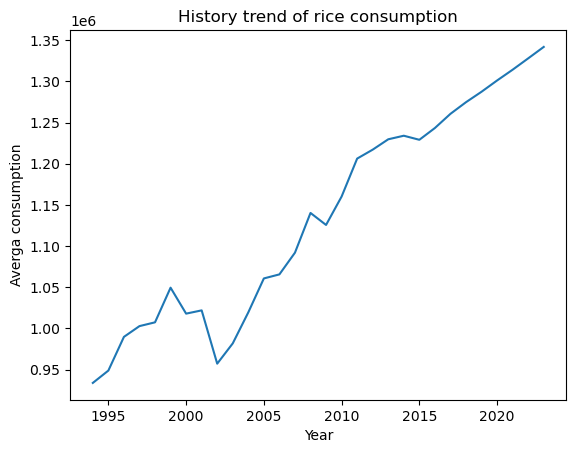

In [37]:
#grouping by the time and evalualting with the average value
rice_history_series = rice_history.groupby('TIME')['Value'].sum()
rice_history_series.plot()
plt.xlabel('Year')
plt.ylabel('Averga consumption')
plt.title('History trend of rice consumption')
# plt.grid(True)
plt.show()

> **WHEAT**

In [38]:
# creating rice data from histroy_df and forecast_df
wheat_history = history_df[history_df['SUBJECT'] == 'WHEAT']
wheat_forecast = forecast_df[forecast_df['SUBJECT'] == 'WHEAT']

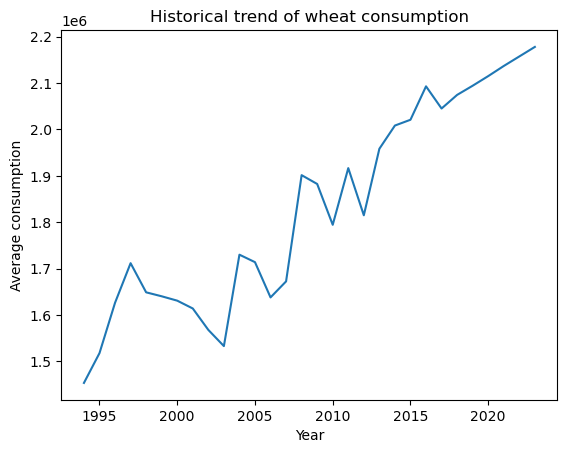

In [39]:
wheat_history_series = wheat_history.groupby('TIME')['Value'].sum()
wheat_history_series.plot()
plt.xlabel('Year')
# plt.xticks(range(2023, 2027))
plt.ylabel('Average consumption')
plt.title('Historical trend of wheat consumption')
# plt.grid(True)
plt.show()

> **MAIZE**

In [40]:
# creating rice data from histroy_df and forecast_df
maize_history = history_df[history_df['SUBJECT'] == 'MAIZE']
maize_forecast = forecast_df[forecast_df['SUBJECT'] == 'MAIZE']

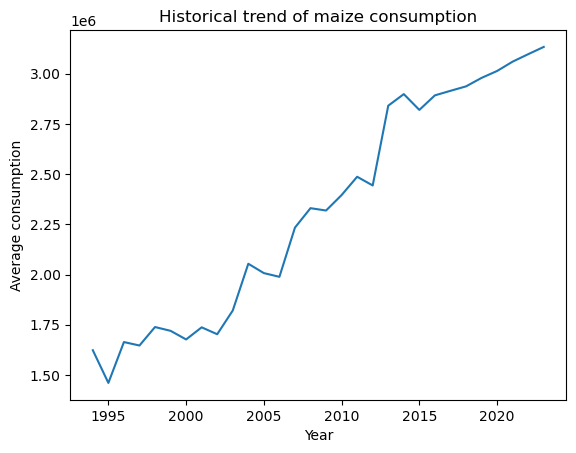

In [41]:
maize_history_series = maize_history.groupby('TIME')['Value'].sum()
maize_history_series.plot()
plt.xlabel('Year')
# plt.xticks(range(2023, 2027))
plt.ylabel('Average consumption')
plt.title('Historical trend of maize consumption')
# plt.grid(True)
plt.show()

> **SOYBEAN**

In [42]:
# creating rice data from histroy_df and forecast_df
soybean_history = history_df[history_df['SUBJECT'] == 'SOYBEAN']
soybean_forecast = forecast_df[forecast_df['SUBJECT'] == 'SOYBEAN']

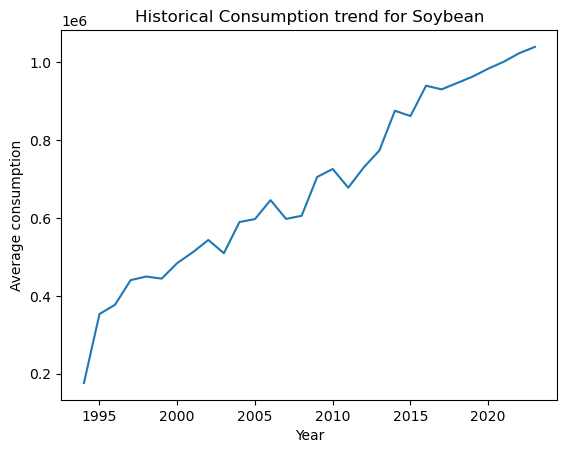

In [43]:
soybean_history_series = soybean_history.groupby('TIME')['Value'].sum()
soybean_history_series.plot()
plt.xlabel('Year')
plt.ylabel('Average consumption')
plt.title('Historical Consumption trend for Soybean')
plt.show()

<a name="forecast"></a>
#### 3.3.2 Forecast Consumption Trends

> **RICE**

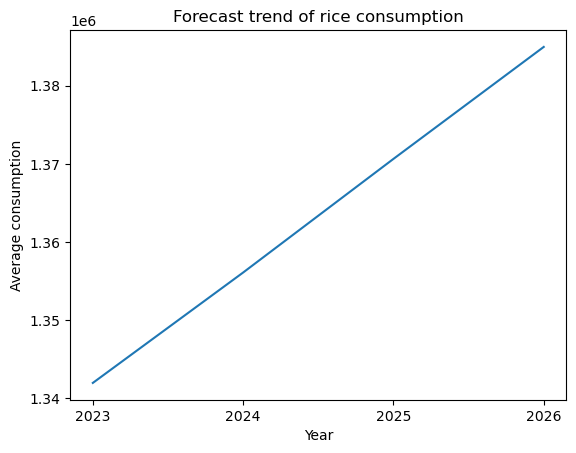

In [44]:
rice_forecast_series = rice_forecast.groupby('TIME')['Value'].sum()
rice_forecast_series.plot()
plt.xlabel('Year')
plt.xticks(range(2023, 2027))
plt.ylabel('Average consumption')
plt.title('Forecast trend of rice consumption')
# plt.grid(True)
plt.show()

> **WHEAT**

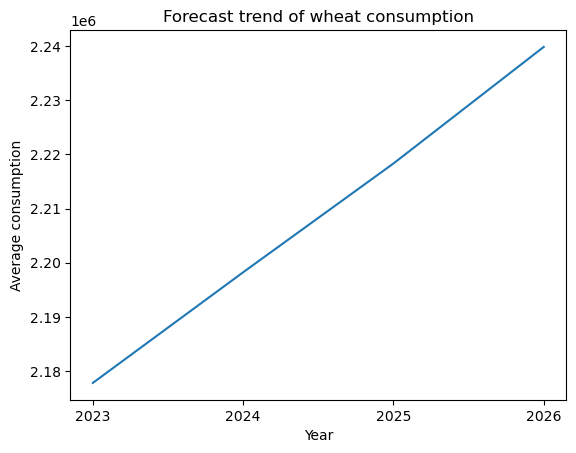

In [45]:
wheat_forecast_series = wheat_forecast.groupby('TIME')['Value'].sum()
wheat_forecast_series.plot()
plt.xlabel('Year')
plt.xticks(range(2023, 2027))
plt.ylabel('Average consumption')
plt.title('Forecast trend of wheat consumption')
# plt.grid(True)
plt.show()

> **MAIZE**

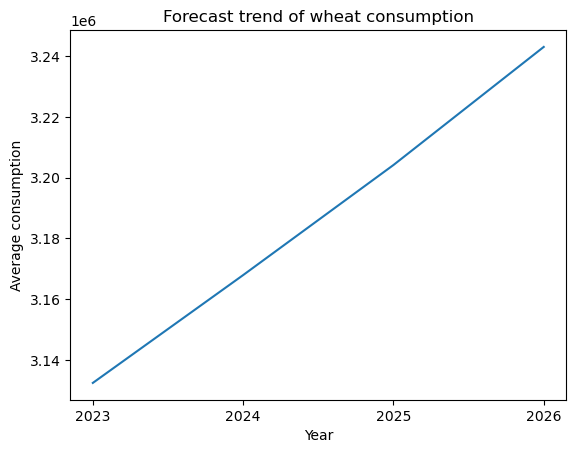

In [46]:
maize_forecast_series = maize_forecast.groupby('TIME')['Value'].sum()
maize_forecast_series.plot()
plt.xlabel('Year')
plt.xticks(range(2023, 2027))
plt.ylabel('Average consumption')
plt.title('Forecast trend of wheat consumption')
# plt.grid(True)
plt.show()

> **SOYBEAN**

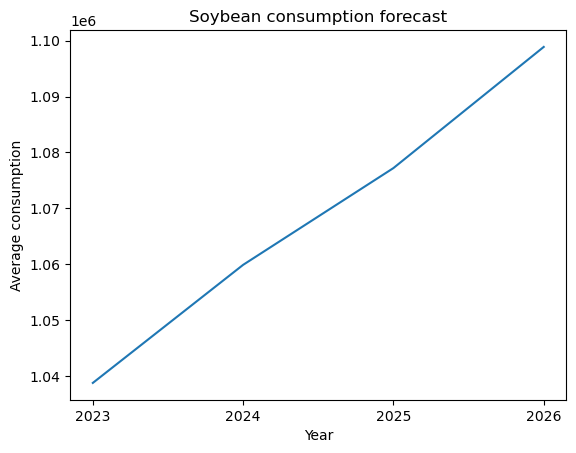

In [47]:
soybean_forecast_series = soybean_forecast.groupby('TIME')['Value'].sum()
soybean_forecast_series.plot()
plt.xlabel('Year')
plt.xticks(range(2023, 2027))
plt.ylabel('Average consumption')
plt.title('Soybean consumption forecast')
# plt.grid(True)
plt.show()